## Stochastic gene expression using Gillespie algorithm

>_"Life is a study in contrasts between **randomness** and **determinism**: from the chaos of biomolecular interactions to the precise coordination of development, living organisms are able to resolve these two seemingly contradictory aspects of their internal workings."_
>
>[Raj & van Oudenaarden, 2008](https://www.sciencedirect.com/science/article/pii/S0092867408012439?via%3Dihub)

<img src="https://www.insidescience.org/sites/default/files/2020-06/machine-rng.jpg"/>

### Table of Contents

* [Part I:](#partI)
    * [Brownian motion as paradigm of stochastic processes](#section_1_1)
    * [Let's simulate it](#section_1_2)
    * [Everything is stochastic, but what are the stochastic events that really matter?](#section_1_3)

* [Part II:](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

In [1]:
%load_ext autoreload
%autoreload 2

## Part I <a class="anchor" id="partI"></a>

#### Brownian motion as paradigm of stochastic processes <a class="anchor" id="section_1_1"></a>

The discovery of [**Brownian motion**](https://en.wikipedia.org/wiki/Brownian_motion) predates the development of **statistical mechanics** and provided important insight to physicists of the early twentieth century in their first formulations of an atomic description of matter.

<img src="Figures/Brownianmotion.gif" style="width: 300px;float: right;" />


Brownian motion was discovered somewhat _serendipitously_ in **1828** by botanist **Robert Brown** while he was studying pollen under a microscope. Though many others before him had observed the jittery, random motion of fine particles in a fluid, Brown was the first to catalogue his observations and use them to test hypotheses about the nature of the motion.

The first theoretical explanation of the Brownian motion was given by **A. Einstein** in **1905** who had the idea to look a the problem from a probabilistic point of view by discarding all the microscopic details. 

He interpreted the Brownian motion as coming from the motion of a mesoscopic particle that continuously experiences collisions with the (much smaller) particles of the surrounding fluid.

Since then the Brownian Motion has become the _paradigm_ of a large class of [stochastic processes](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/stochastic-processes) and more generally to the statistical mechanics of non-equilibrium.

### Let's simulate it <a class="anchor" id="section_1_2"></a>

**Below** you can find a model to make a stochastic simulation of Brownian motions.

A **"for loop"** is used in order to repeat a number of time the simulation!

> 1) **Change** the number of loops (in the cell below) and observe the result of multiple simulation using the same combination of parameters.
> 
> 2) **Observe** the different plots

In [2]:
from utils.brownian_function import brownian
from utils import plotting_tools as pt


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # package to make plot
%matplotlib inline

In [3]:
B_params = {
    'n_loops':10,
    # The Wiener process parameter.
    'delta':0.25, #It determins the speed of th process
    'T' : 10.0, # Total time.
    'N' : 500, # Number of steps
}

B_params['dt'] = B_params['T'] / B_params['N'] # Time step size
B_params['x'] =  np.empty((2,B_params['N']+1)) # Initial values of x.
B_params['x'][:, 0] = 0.0  

In [4]:
pt.plot_loop_subplot(x=B_params['x'], b_params=B_params, 
                     savein=folder / "Brownian_motion_black.png")

NameError: name 'folder' is not defined

> Cuold you **reproduce** the same result (plot) at least twice?
#### This brings to the question ... how stochastic simulation works?
#### What is the **magic** in it?


> Stochastic simulation uses [**random number generators**](https://en.wikipedia.org/wiki/Random_number_generation).

<img src="Figures/dilbert.jpg"/>

> 3. **Run** the cell below more than 1 time ( **shift+enter**). 
>In each "for loop" the function **np.random.randint()** draws a (pseudo)random number between 1 & 1000

In [ ]:
n_loops = 10
for i in range(n_loops): 
    
    # Generated random number will be between 1 to 1000.
    print(np.random.randint(1, 1000))  

> 4. In the cell below paste the same code of the previews cell.
>    Add INSIDE the loop (rember to indent!) the following line:
     **np.random.seed(42)** 

This will allow you to fix the seed of the random number generator and therefore to **reproduce** the same random number!
This is very important if you want to make your stochastic simulation reproducible.

In [ ]:
# HERE paste the code 








Every molecular event in the cell is the result of **random** encounters between molecules, 
some of which are present in **small numbers**, therefore the biochemical processes that regulate transcription initiation are inherently **stochastic**".

Before the **single cell era**, classic molecular biology have considered just **average measuremnts (_aka bulk_)**.

Average & population (probabilistic) behavior **can be modelled**, respectively with:
#### <span a style="color:blue">**Deterministic** </span> vs <span a style="color:green">**Stochastic** </span> mathematical models. 
The following are the main difference between the two.


><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Master equation** </span>
> *****
><span a style="color:blue">**Odinary differential equations (ODEs)** </span>
>
><span a style="color:green">**Gillespie Algorithm** </span>
> *****
><span a style="color:blue">**Concetration of molecules** </span>
>
><span a style="color:green">**Number of molecules** </span>
> *****
><span a style="color:blue">**Future is predictable given present knowledge** </span>
>
><span a style="color:green">**Includes randomness: Every simulation is different** </span>
> *****
><span a style="color:blue">**Good for a large number of molecules; qualitative analysis** </span>
>
><span a style="color:green">**Better for simulating dynamics with small numbers of molecules** </span>
> *****
><span a style="color:blue">**Represents** population **average** </span>
>
><span a style="color:green">**Represents** population **variability** </span>

### This brings to the problem that we have to deal with a **distributions** instead of single values.

The <span style="color:blueviolet">**shape** </span> of any distribution can be described by its various ‘moments’. The first four are:

>1) The **mean**, which indicates the central tendency of a distribution.
>
>2) The second moment is the **variance**, which indicates the width or deviation.
>
>3) The third moment is the **skewness**, which indicates any asymmetric ‘leaning’ to either left or right.
>
>4) The fourth moment is the **Kurtosis**, which indicates the degree of central ‘peakedness’ or, equivalently, the ‘fatness’ of the outer tails.

<span style="color:blueviolet">**How we can quantify the variability from a distribution!?** </span>

One way to measure the dispersion of a probability distribution is **Fano factor:**

$$ F = \frac{\sigma^2}{\mu} $$




###  Let's calculate some of these **moments** of a known theoretical distribution: [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) 

<span style="color:blueviolet">**np.random.poisson( )** </span> is a function that allows you to draw **random** number sampling from a predefined poisson distribution. 
- <span style="color:blueviolet">**use** </span> 3 lambdas, to produce 3 "datasets" (if lam=10 the ditribution will have average 10)
- <span style="color:blueviolet">**calculate**</span> **mean**, **variance** and **Fano** using <span style="color:blueviolet">**np( )**</span> function and **print** the result! 

In [5]:
# e.g. 
# mean = np.mean(Poisson_Dataset_1)
# print(mean)

In [6]:
N_Cells = 1000 
Poisson_Dataset_1 = np.random.poisson(lam= 10.0, size= N_Cells)
Poisson_Dataset_2 = np.random.poisson(lam= 100.0, size= N_Cells)
Poisson_Dataset_3 = np.random.poisson(lam= 1000.0, size= N_Cells)

In [7]:
Distr_dict = {'Dataset 1':Poisson_Dataset_1,
              'Dataset 2':Poisson_Dataset_2,
              'Dataset 3':Poisson_Dataset_3}

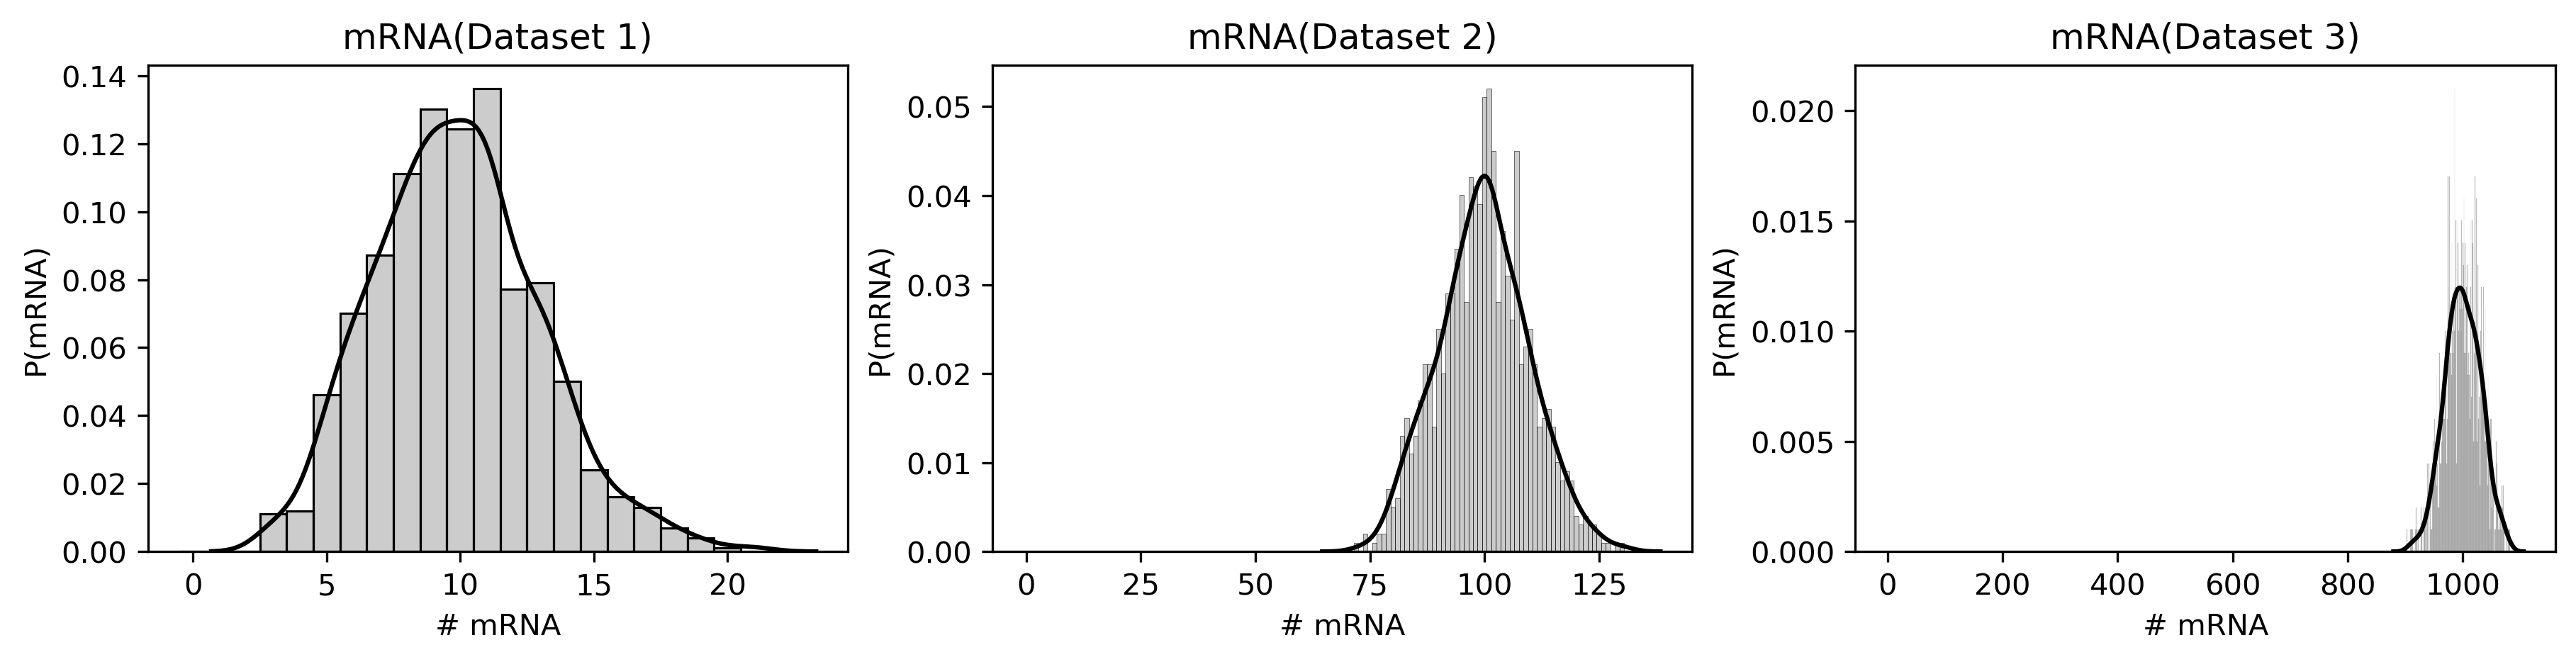

In [8]:
fig, axs = plt.subplots(1, 3,figsize=(12,3),constrained_layout=True, dpi=300)
axs = axs.ravel()

for ix, (k, v) in enumerate(Distr_dict.items()):
    
    sns.kdeplot( v, color = 'black', ax = axs[ix]);
    sns.histplot(v, color = 'black', stat='probability', bins = pt.hist_bins(v), alpha = 0.2, ax = axs[ix])

    axs[ix].set_title('mRNA'+'(' + k + ')',fontsize=12);
    axs[ix].set_ylabel("P(mRNA)"), axs[ix].set_xlabel("# mRNA");

In [9]:
mean1 = np.mean(Poisson_Dataset_1).round()
mean2 = 2
mean3 = 3

In [10]:
var1 = np.var(Poisson_Dataset_1).round()
var2 = 1
var3 = 1

In [11]:
# See the formula above and compute the fano!
fano1 = 1
fano2 = 1
fano3 = 1

#### Let's make a table with your results.

In [12]:
table = pd.DataFrame({'Mean'    : [mean1,mean2,mean3],
                      'Fano'    : [fano1, fano2, fano3],
                      'Variance': [var1, var2,var3]})

display(table)

NameError: name 'pd' is not defined

> 1. Does the mean correspond with the **lambda** that you predefined?
> 2. Does the Fano factor changes with the mean?

In [ ]:
x = table['Mean']
y = table['Fano']

plt.figure(figsize=(6,3),dpi=100)
plt.plot(x,y,'-')
plt.xlabel('mean')
plt.ylabel('Fano');

### Take Home Message
<img src="Figures/Home_message.png" style="width: 100px;"/> 

>1. Poisson distribution is represent the **_minimal thermodyanmic noise_** of a molecular system.
>
>2. It's mean and variance are always the same, therefore **Fano factor is 1**.
>
>3. When the fluctuation from the average values is so low the Deterministic prediction is good appproxymation of the stochastic. 

<img src="Figures/FanoFactor_Distributions.png"  style="width: 200px;float: right;"/>

### Everything is stochastic, but what are the stochastic events that really matter? <a class="anchor" id="section_1_3"></a>



Most of the time the variability in the distribution is irrelevant (Poisson), in this cases the average behavior is a good approximation for the entire population.

Genetically identical cells (**isogenic population**) in an identical environment behave differently, leading to significant consequences in many biological process from bacterial bet-hadging to mammalian decision-making and development.

Every molecular event in the cell is the result of **random** encounters between molecules, 
some of which are present in **small numbers**, therefore the biochemical processes that regulate transcription initiation are inherently **higly stochastic**.

The well-known potential source of this cell-to-cell variability is a noisy messenger RNA production in transcription, which is the so-called **‘transcriptional bursting’**, and this mechanism has been broadly studied by theoretical and experimental approaches. 

According to the theoretical studies (but also experimental obseravtions), transcriptional bursting can be explained by a **two-state model** of gene regulation, where a gene switches between on and off states.



###  To better appriciate the adding values of stochastic simulation 
#### We will simulate **minimal model** for bursty trasncription in both <span style="color:red">**deterministic** </span> & <span style="color:red">**stochastic** </span> mathematical model.
<img src="Figures/minimal_burst_model.png" alt="Drawing" style="width: 500px;"/> 

> 
**This model has just 3 parameter!** 
> 

## Let's start with a <span style="color:red">deterministic </span> model.
<img src="Figures/average_mRNA.png" alt="Drawing" style="width: 400px;"/> 

<span style="color:blueviolet">**Solve** </span> the equation above and <span style="color:blueviolet">**calculate analitically** </span> the **average** number of mRNA at steady state for the following cases:
  1) k_burst = 10 / burst_size = 1 / k_deg = 1;
  2) k_burst = 100 / burst_size = 1 / k_deg = 0.1;
  3) k_burst = 1 / burst_size = 10 / k_deg = 1;

In [ ]:
## Calculate and print!

aver_1 =  42 # here you calculate e.g. (100*1)/0.1
aver_2 =  42 # here you calculate
aver_3 =  42 # here you calculate

aver_list = [aver_1,aver_2,aver_3]

for i,a in enumerate(aver_list):
    print('average {}: {}'.format(i+1,a))

### Now for the same set of parameters: 

  1) k_burst = 10 / burst_size = 1 / k_deg = 1;
  2) k_burst = 100 / burst_size = 1 / k_deg = 0.1;
  3) k_burst = 1 / burst_size = 10 / k_deg = 1;
  
We will <span style="color:blueviolet">**calculate numerically** </span> the **average** number of mRNA at steady state for the following cases:


  
><span style="color:blueviolet">**ODE_Plot( )** </span> is a function contains **odeint()** which **integrates** a system of ordinary differential equations and then plots the results.
- <span style="color:blueviolet">**change** </span> the **parameters** in the following command cell;
- <span style="color:blueviolet">****check**** </span> if the **analystical solution** agree with **numerical** one!

In [ ]:
Dataset_1 = {'k_burst': 50,
             'k_deg'  : 1,
             'burst_size' : 1}

In [ ]:
Dataset_2 = {'k_burst': 10,
             'k_deg'  : 0.1,
             'burst_size' : 1}

In [ ]:
Dataset_3 = {'k_burst': 4,
             'k_deg'  : 1,
             'burst_size' : 50}

In [ ]:
Datasets_param = {'Dataset_1':Dataset_1,
                  'Dataset_2':Dataset_2,
                  'Dataset_3':Dataset_3}

In [ ]:
for param in Datasets_param.keys():
    
    k_burst    = Datasets_param[param]['k_burst']
    burst_size = Datasets_param[param]['k_deg']
    k_deg      = Datasets_param[param]['burst_size']
      
    pt.ODE_Plot(k_burst,burst_size,k_deg)

## And now the <span style="color:red">stochastic </span> counterpart.

#### To do this we need to implement the [Gillespie algorithm](https://en.wikipedia.org/wiki/Gillespie_algorithm)  that is stochastic simulation algorithm (SSA).

>It is used in probability theory generates a statistically correct <span style="color:red">trajectory </span>  (possible solution) of a stochastic equation. It was created by Joseph L. Doob and others (circa 1945), presented by Dan Gillespie in 1976, and popularized in 1977 in a [paper](https://pubs.acs.org/doi/abs/10.1021/j100540a008) where he uses it to simulate chemical or biochemical systems of reactions efficiently and accurately using limited computational power.

<span style="color:red">!!! Skip the following reading if you are already running out of time! </span>
************

#### Canonical steps of this algorithm are the following (math omitted):
<span style="color:blueviolet">**1.Initialization:** </span> 

Initialise the number of molecules in the system, reaction constants, and random number generators.

<span style="color:blueviolet">**2. Monte Carlo step:** </span>

Generate **2 random numbers** to determine the next reaction to occur as well as the time interval. 

>The <span style="color:blueviolet">**first** </span> random number is drawn from an **uniform distribution** (between 0-1).
>
>This will allow to choose which reaction will take place in each iteration (bursting or degradation?).
>**NB!** 
>The probability of a given reaction to be chosen is proportional to the number of substrate molecules.
>
> - If the number of mRNA molecules is ZERO also the Probability to degrade them is ZERO!
>The <span style="color:blueviolet">**second** </span> random number is drawn from an **exponential distribution** in which the parameter  **lambda** is the SUM of the propensities.
>
>The time interval is exponentially distributed with mean.

<span style="color:blueviolet">**3. Update:** </span>

Increase the time step by the randomly generated time in **Step 2**. Update the molecule count based on the reaction that occurred.

<span style="color:blueviolet">**4. Iterate:** </span>

Go back to Step 2 unless the number of reactants is zero or the simulation time has been exceeded.

In [ ]:
from utils.gillespie_time_average_function import *

In [ ]:
# the output of this function are 2 lists: time_steps(time points) &  mRNA_trajectory (mRNA content for each of them)
Distr_dict= {}
for param in Datasets_param.keys():
    
    time_steps, mRNA_trajectory = gillespie_time_average(N_RUNS = 500000,
                                                         k_burst = Datasets_param[param]['k_burst'], 
                                                         k_deg   = Datasets_param[param]['k_deg'], 
                                                         burst_size = Datasets_param[param]['burst_size']) 
    Distr_dict[param] = mRNA_trajectory[100:]
    pt.Stoch_Plot(time_steps, mRNA_trajectory)


#### Set the parameters for three different datasets.

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(12,3),constrained_layout=True, dpi=300)
axs = axs.ravel()

for ix, (k, v) in enumerate(Distr_dict.items()):
    
    sns.kdeplot( v, color = 'black', ax = axs[ix]);
    sns.histplot(v, color = 'black', stat='probability', bins = hist_bins(v), alpha = 0.2, ax = axs[ix])

#     axs[ix].legend(['mRNA'+'(' + k + ')']);
    axs[ix].set_ylabel("P(mRNA)"), axs[ix].set_xlabel("# mRNA");



### Take Home Message
<img src="Figures/Home_message.png" style="width: 100px;"/> 

>1. Poisson distribution is represent the **_minimal thermodyanmic noise_** of a molecular system.
>
>2. It's mean and variance are always the same, therefore **Fano factor is 1**.
>
>3. When the fluctuation from the average values is so low the Deterministic prediction is good appproxymation of the stochastic. 

### Save requirements for this Notebook

In [14]:
!pipreqs --force /Users/stefaniaastrologo/Documents/Github/Lake-Como-School_Tutorial_2021/ 

INFO: Successfully saved requirements file in /Users/stefaniaastrologo/Documents/Github/Lake-Como-School_Tutorial_2021/requirements.txt


In [19]:
!conda list -e > requirements.txt